Calculation and Visualization of correlation matrix.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

file_path = 'AB_cleaned_formatted.xlsx'
sheet_name = 'Sheet1'

df = pd.read_excel(file_path, sheet_name=sheet_name)

In [2]:
def standarizeMethod(df):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)
    data_scaled_df = pd.DataFrame(data_scaled, columns=df.columns)
    
    return data_scaled_df

def PCAImplementation(df, n, columns):
    # Get n components
    pca = PCA(n_components = n)  
    pca_result = pca.fit_transform(df)

    pca_df = pd.DataFrame(data=pca_result, columns=columns)
    print("Explained Variance Ratio:", pca.explained_variance_ratio_)
    
    return pca_df

def correlationImplementation(x_axis_df, y_axis_df):
    # Calculating pairwise correlations - works best with original dataset
    correlation_matrix = pd.DataFrame(
        index=y_axis_df.columns,
        columns=x_axis_df.columns,
        data=[[y_axis_df[y].corr(x_axis_df[x]) for x in x_axis_df] for y in y_axis_df]
    )
    
    # Plot the heatmap
    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True  )
    
    plt.title('Correlation Matrix Heatmap', fontsize=16)
    plt.show()

Number of dropped rows: 4
Explained Variance Ratio: [0.84300271]


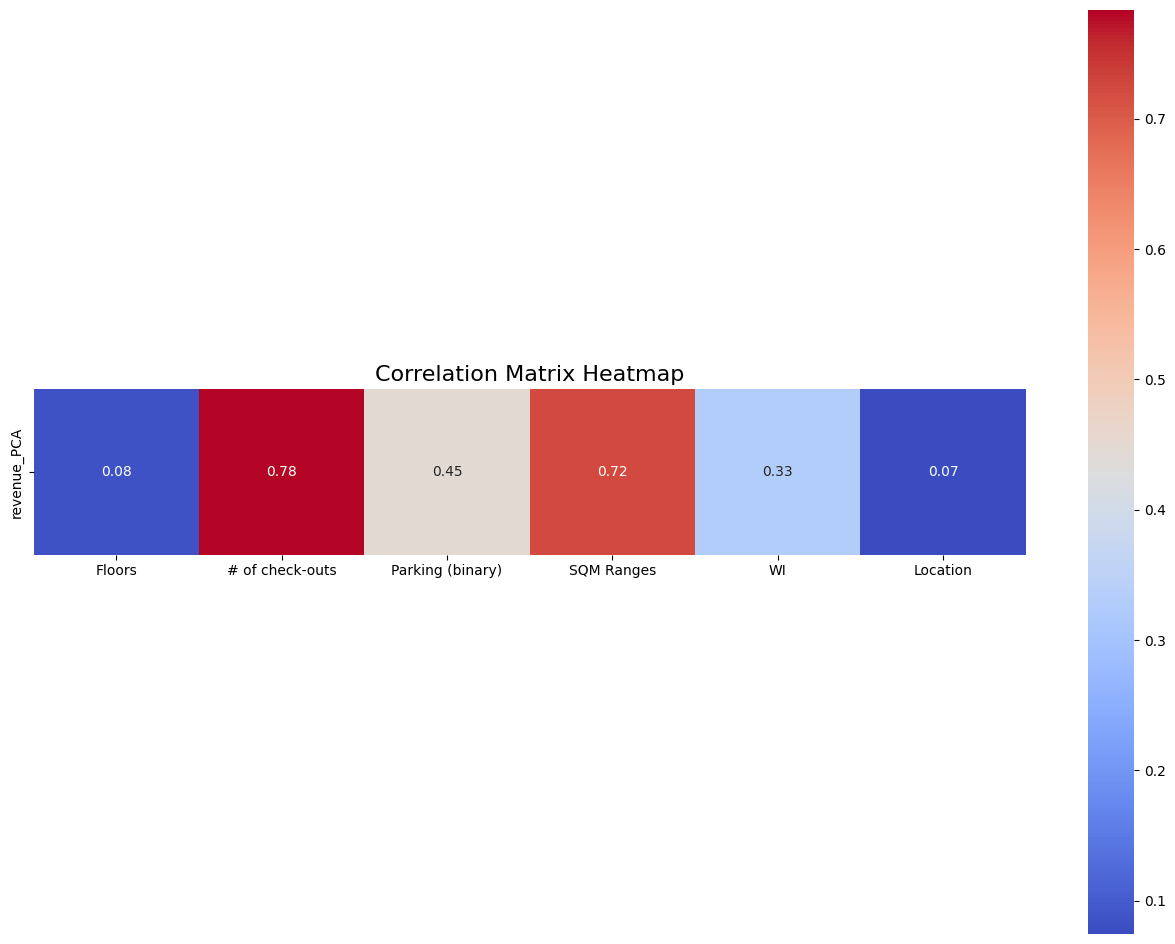

In [3]:
size_columns = [  
    "Floors", 
    "# of check-outs", 
    "Parking (binary)", 
    "SQM Ranges"
]

revenue_columns  = [
    "avg_monthly_revenue", 
    "avg_monthly_volume", 
    "avg_monthly_promo_revenue", 
    "avg_monthly_transactions", 
    "avg_basket_spend"
]

behavior_columns = [
    "Maintenance", 
    "Routine", 
    "Stock-Up", 
    "Top-Up"
]

WI_L = [
    "WI", 
    "Location"
]

# All types of sales - not used because there are too many values and it doesnt make sense as a PCA
df_sales_columns = df.drop(columns = size_columns + revenue_columns + behavior_columns + WI_L + ['retail_store_id'])


# Removing originaly null values
initial_row_count = len(df)
df = df.replace('Empty', pd.NA)
df = df.dropna()
final_row_count = len(df)
dropped_rows = initial_row_count - final_row_count
print(f"Number of dropped rows: {dropped_rows}")


df = standarizeMethod(df)

# df_no_sales = df[revenue_columns + important_columns_no_sales_no_revenue]
# correlationImplementation(df_no_sales)

revenue_pca_df = PCAImplementation(df[revenue_columns], 1, ['revenue_PCA'])
# pca_df = PCAImplementation(df[revenue_columns], 2, ['revenue_PCA1', 'revenue_PCA2'])

# Not used due to low explained variance and poor results
# size_pca_df = PCAImplementation(df[size_columns], 2, ['size_PCA1', 'size_PCA2'])

pca_revenue_important_columns_no_sales = pd.concat([df[size_columns], df[WI_L]], axis=1)
correlationImplementation(pca_revenue_important_columns_no_sales, revenue_pca_df)

PCA is applied in higly correlated features